In [1]:
from sklearn.datasets import fetch_openml

In [2]:
import pandas as pd

In [3]:
mnist = fetch_openml('mnist_784')

In [4]:
x, y = mnist['data'].values, mnist['target'].values

In [5]:
y.shape

(70000,)

In [6]:
x.shape

(70000, 784)

In [7]:
%matplotlib inline

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28, 28)

(-0.5, 27.5, 27.5, -0.5)

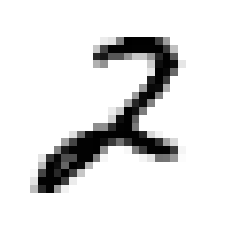

In [10]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [11]:
y[36001]

'2'

In [12]:
x_train = x[:60000]
x_test = x[60000:]

In [13]:
y_train = y[:60000]
y_test = y[60000:]

In [14]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [15]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [16]:
y_train_2

array([False, False, False, ..., False, False, False])

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(tol = 0.1, solver = "lbfgs")

In [19]:
clf.fit(x_train, y_train_2)

c:\users\this pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [20]:
clf.predict([some_digit])

array([ True])

In [21]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy" )

c:\users\this pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\this pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [22]:
a.mean()

0.9779666666666668

In [23]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

c:\users\this pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\this pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [24]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculating confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train_2, y_train_pred)

array([[53549,   493],
       [  829,  5129]], dtype=int64)

In [27]:
confusion_matrix(y_train_2, y_train_2) # ideal confusion matrix

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Precision and Recall

In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
precision_score(y_train_2, y_train_pred)

0.9123087869085734

In [30]:
recall_score(y_train_2, y_train_pred)

0.8608593487747567

## F1-Score

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_train_2, y_train_pred)

0.8858376511226254

## Precision Recall Curve

In [33]:
from sklearn.metrics import precision_recall_curve

In [40]:
y_scores = cross_val_predict(clf, x_train, y_train_2, cv=3, method="decision_function" )

c:\users\this pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\this pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [41]:
y_scores

array([ -3.66769793,  -7.83724116, -17.14870186, ...,  -5.04033591,
        -9.05107882,  -3.15407882])

In [42]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [43]:
precisions

array([0.10089413, 0.1008789 , 0.10088061, ..., 1.        , 1.        ,
       1.        ])

In [44]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [45]:
thresholds

array([-24.58706528, -24.58610274, -24.58297604, ...,  17.66965188,
        18.71614855,  19.80693988])

## Plotting the Precision Recall Curve

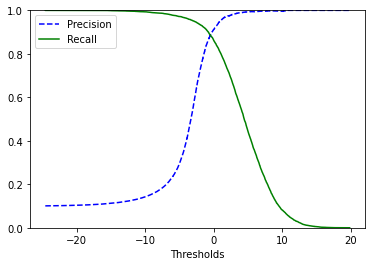

In [49]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()